<a href="https://colab.research.google.com/github/drihn/EXERCISE_DEEPLEARNING/blob/main/Exercize_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-05-21 11:55:25--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.26, 104.192.142.25, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.0MB/s    in 6.0s    

2025-05-21 11:55:33 (16.8 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

## Import Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


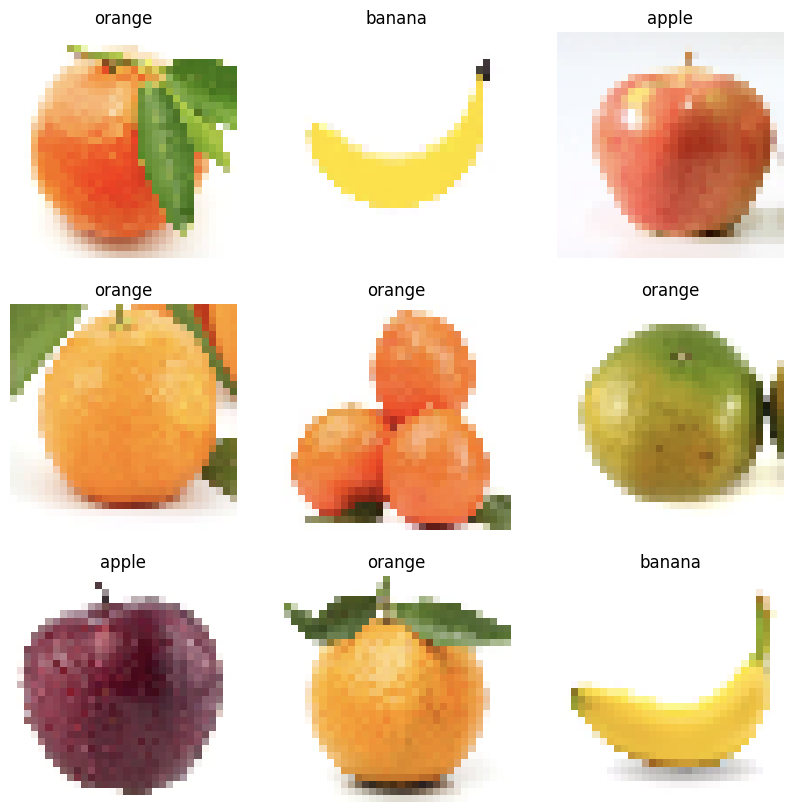

In [6]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [8]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [9]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4171 - loss: 1.0365 - val_accuracy: 0.6970 - val_loss: 0.6879
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6810 - loss: 0.7145 - val_accuracy: 0.6667 - val_loss: 0.5432
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7479 - loss: 0.5777 - val_accuracy: 0.7121 - val_loss: 0.4786
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.8383 - loss: 0.4111 - val_accuracy: 0.8485 - val_loss: 0.3590
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8803 - loss: 0.2920 - val_accuracy: 0.8485 - val_loss: 0.3799
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9534 - loss: 0.1745 - val_accuracy: 0.9091 - val_loss: 0.2120
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9516 - loss: 0.1353 - val_accuracy: 0.9545 - val_loss: 0.1092
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9568 - loss: 0.1318 - val_accuracy: 1.0000 

In [10]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9724 - loss: 0.1039


[0.14385071396827698, 0.9538461565971375]

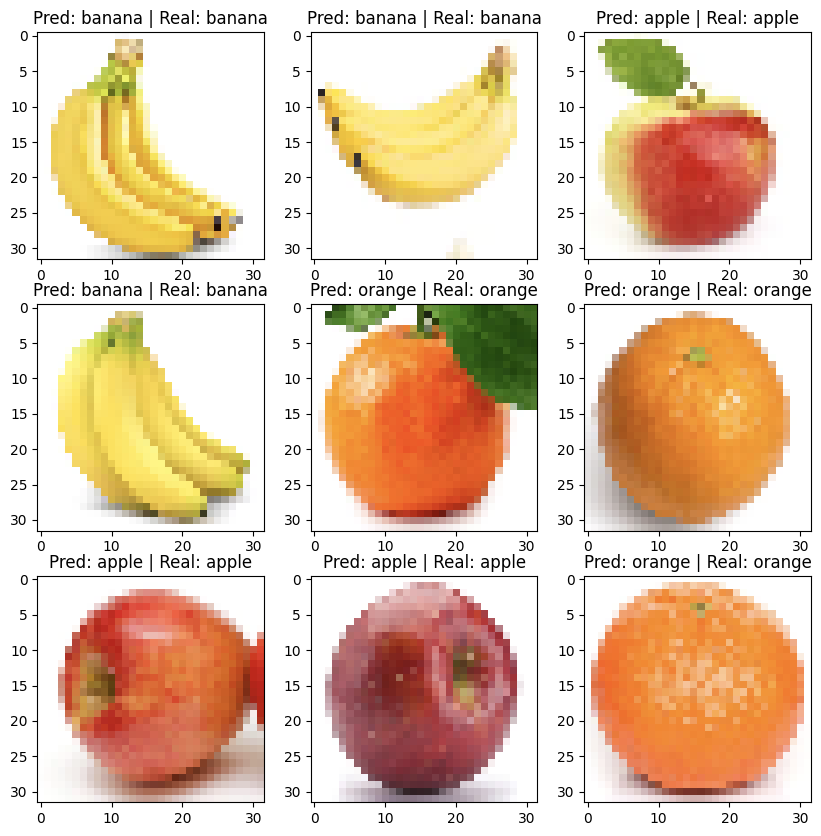

In [11]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpoyirbp_n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139450102068432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447759028048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447387422800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323862096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323861520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323863056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323863440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323864400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323864784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447323865744: TensorSpec(shape=(), dtype=tf.resource, name=None)
